# PROBLEM STATEMENT AND BUSINESS CASE

**Hiring & retraining employees require substantial time, skills and capital and this can impact small businesses particularly.**
**High employee attrition will lead to significant disruption and utimately higher costs. Therefore it is in the interests of a business to understand the drivers of attrition and take steps to minimise employee attrition.**

**Using models to predict if a staff member is likely to quit can support HR's ability to be proactive and to take actions to prevent or at least minimise the probability of the employee leaving.**  



#### This data set was obtained from a IBM survey and is available here  https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset

#### The data will of course be relevant to the company that gathered the data, however as a future development, companies and businesses can gather data more relevent to their line of business hence providing a platform for generating new insights and what drives attrition in their business. 

![alt text](https://drive.google.com/uc?id=1evbDHoW2t0emxkbQd8yevYFZ5woJKRPY)

##  IMPORT LIBRARIES AND DATASETS

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('Human_Resources.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


35 features in total, each contains 1470 data points

In [6]:
# how many features with integers ('int64')
len(df.select_dtypes(['int64']).columns)

26

In [7]:
# how many features with categories ('object')
len(df.select_dtypes(['object']).columns)

9

In [220]:
df['Age'].describe()['mean']

36.923809523809524

## VISUALIZE DATASET

In [8]:
print(df['Attrition'].value_counts())
print('\n')
print(df['Attrition'].unique())
print('\n')
print(df['OverTime'].value_counts())
print('\n')
print(df['Over18'].value_counts())

No     1233
Yes     237
Name: Attrition, dtype: int64


['Yes' 'No']


No     1054
Yes     416
Name: OverTime, dtype: int64


Y    1470
Name: Over18, dtype: int64


###### Let's replace 'Attrition' , 'overtime' , 'Over18' column with integers before performing any visualizations 

In [9]:
df['Attrition'] = df['Attrition'].map({'Yes':1, 'No':0})

In [10]:
print(df['Attrition'].value_counts())

0    1233
1     237
Name: Attrition, dtype: int64


In [11]:
df['OverTime'] = df['OverTime'].replace({'Yes': 1, 'No': 0})
print(df['OverTime'].value_counts())

0    1054
1     416
Name: OverTime, dtype: int64


In [12]:
df['Over18'] = df['Over18'].apply(lambda x:1 if x =='Y' else 0)
print(df['Over18'].value_counts())

1    1470
Name: Over18, dtype: int64


In [13]:
# Let's see if we have any missing data, luckily we don't!
df.isnull().sum().any()

False

##### Variable Distribution

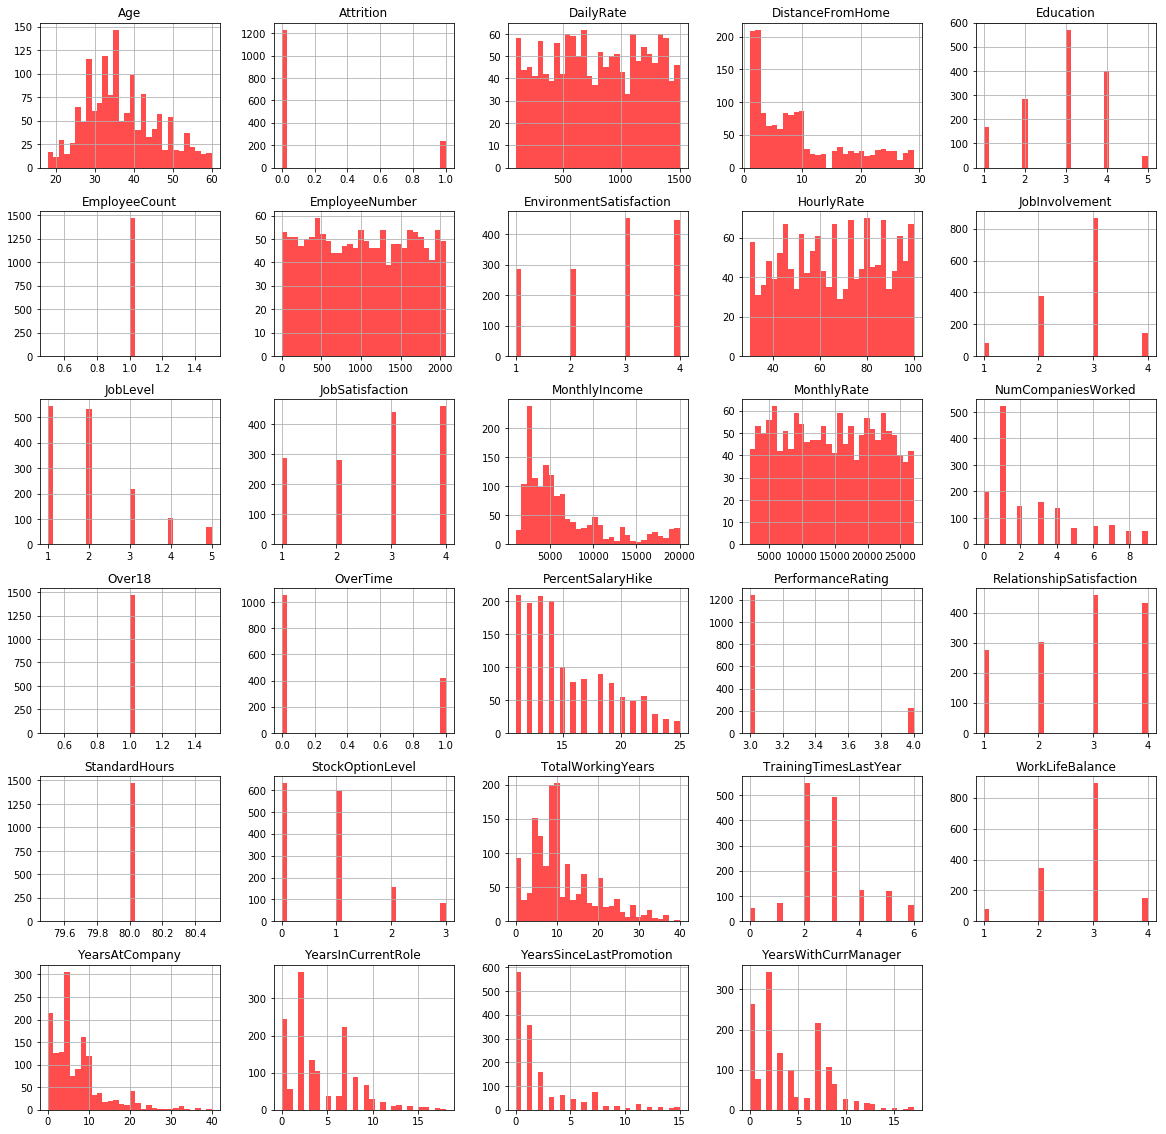

In [15]:
df.hist(bins=30, color='red', alpha=0.7, figsize=(20,20));
# Several features such as 'MonthlyIncome' and 'TotalWorkingYears' are tail heavy
# It makes sense to drop 'EmployeeCount' and 'Standardhours' since they do not change from one employee to the other

##### If we look at the attrition, a lot of employees have stayed. To get an idea oof why employees leave we should study those who left - what do they do, are they younger, single/married, maybe not happy, or not paid well. So how do we keep them in the Company?

- Monthly income is tail heavy, a lot of employees are getting paid between 0 and 5000 and a lot less employess as you move towards the 20000 scale.

- For percent Salary hike a lot of employees got between 0 and 10% and 15%. 25% pay rise looks unlikely.

- Total working years is mostly beween 0-10 years



In [16]:
# It makes sense to drop 'EmployeeCount', 'Standardhours' and 'Over18' since they do not change from one employee to the other
# Let's drop 'EmployeeNumber' as well
df.drop(['EmployeeCount','StandardHours','Over18','EmployeeNumber'], axis=1, inplace=True)

In [18]:
# Let's see how many employees left the company! 
df['Attrition'].value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

In [20]:
print('No. of emploees who left: ', len(df[df['Attrition'] == 1]))
print('Percentage of employees who left: ', round((len(df[df['Attrition'] == 1]))/(len(df)) *100), '%')
print('\n')
print('No. of emploees who stayed: ', len(df[df['Attrition'] == 0]))
print('Percentage of employees who stayed: ', round((len(df[df['Attrition'] == 0]))/(len(df)) *100), '%')

No. of emploees who left:  237
Percentage of employees who left:  16 %


No. of emploees who stayed:  1233
Percentage of employees who stayed:  84 %


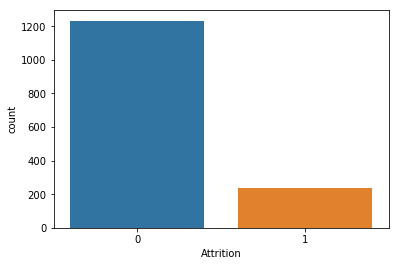

In [19]:
# Count the number of employees who stayed and left
# It seems that we are dealing with an imbalanced dataset 
sns.countplot(x='Attrition', data = df)

#### As the graph shows, the dataset is unbalanced. When training models on such datasets, class unbalance influences a learning algorithm during training by making decision rule biased towards the majority class and optimizes the predictions based on the majority class in the dataset. There are are a number of ways to deal with this issue - check out model section

**Mean & Std Dev**

In [21]:
# Age
df.groupby('Attrition')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Attrition,,,,,,,,
0,1233.0,37.561233,8.88836,18.0,31.0,36.0,43.0,60.0
1,237.0,33.607595,9.68935,18.0,28.0,32.0,39.0,58.0


In [22]:
# DailyRate
df.groupby('Attrition')['DailyRate'].describe()

,count,mean,std,min,25%,50%,75%,max
Attrition,,,,,,,,
0,1233.0,812.504461,403.208379,102.0,477.0,817.0,1176.0,1499.0
1,237.0,750.362869,401.899519,103.0,408.0,699.0,1092.0,1496.0


In [23]:
# Distance from home
df.groupby('Attrition')['DistanceFromHome'].describe()

,count,mean,std,min,25%,50%,75%,max
Attrition,,,,,,,,
0,1233.0,8.915653,8.012633,1.0,2.0,7.0,13.0,29.0
1,237.0,10.632911,8.452525,1.0,3.0,9.0,17.0,29.0


In [24]:
# Satisfaction
df.groupby('Attrition')['EnvironmentSatisfaction'].describe()

,count,mean,std,min,25%,50%,75%,max
Attrition,,,,,,,,
0,1233.0,2.771290,1.071132,1.0,2.0,3.0,4.0,4.0
1,237.0,2.464135,1.169791,1.0,1.0,3.0,4.0,4.0


In [25]:
# Stock Options
df.groupby('Attrition')['StockOptionLevel'].describe()

,count,mean,std,min,25%,50%,75%,max
Attrition,,,,,,,,
0,1233.0,0.845093,0.841985,0.0,0.0,1.0,1.0,3.0
1,237.0,0.527426,0.856361,0.0,0.0,0.0,1.0,3.0


#### Comparing the mean and std of the employees who stayed and left:
- 'age': mean age of the employees who stayed is higher compared to who left
- 'DailyRate': Rate of employees who stayed is higher
- 'DistanceFromHome': Employees who stayed live closer to home 
- 'StockOptionLevel': Employees who stayed tend to have higher stock option level

##### Correlations

(25, 0)

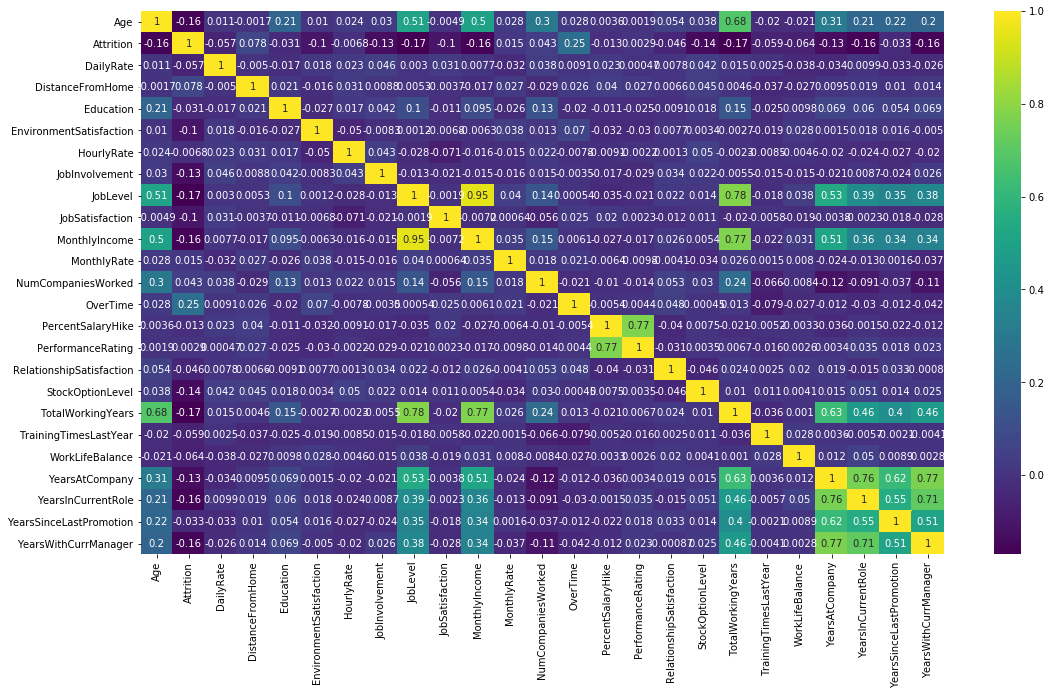

In [232]:
plt.figure(figsize=(18,10))
sns.heatmap(df.corr(), annot=True, cmap='viridis')
plt.ylim(25,0)

#### Correlations:
- Job level is strongly correlated with total working year - the more employees stay at the company they progress to a 
higher job level
- Monthly income is strongly correlated with total working years - which is similar to above
- Age & total working years - makes sense. he longer you work there the highr age you  will be
-  Monthly income is strongly correlated with Job level - makes sense, the higher the job level the higher the income
- Age is stongly correlated with monthly income
- Performance Rating is obviously correlated to Percent salary hike
- Quite a lot of positive correlations

In [27]:
df_corr = df.corr().unstack().reset_index()
df_corr = df_corr[(df_corr[0] < 1) ]
df_corr = df_corr.sort_values(by=0,ascending=False)
df_corr.head(20)

,level_0,level_1,0
210,JobLevel,MonthlyIncome,0.950300
258,MonthlyIncome,JobLevel,0.950300
458,TotalWorkingYears,JobLevel,0.782208
218,JobLevel,TotalWorkingYears,0.782208
365,PercentSalaryHike,PerformanceRating,0.773550
389,PerformanceRating,PercentSalaryHike,0.773550
268,MonthlyIncome,TotalWorkingYears,0.772893
460,TotalWorkingYears,MonthlyIncome,0.772893
549,YearsAtCompany,YearsWithCurrManager,0.769212
621,YearsWithCurrManager,YearsAtCompany,0.769212


#### Feature correlation with the Label

In [28]:
df.corr()['Attrition'].sort_values(ascending=False)

Attrition                   1.000000
OverTime                    0.246118
DistanceFromHome            0.077924
NumCompaniesWorked          0.043494
MonthlyRate                 0.015170
PerformanceRating           0.002889
HourlyRate                 -0.006846
PercentSalaryHike          -0.013478
Education                  -0.031373
YearsSinceLastPromotion    -0.033019
RelationshipSatisfaction   -0.045872
DailyRate                  -0.056652
TrainingTimesLastYear      -0.059478
WorkLifeBalance            -0.063939
EnvironmentSatisfaction    -0.103369
JobSatisfaction            -0.103481
JobInvolvement             -0.130016
YearsAtCompany             -0.134392
StockOptionLevel           -0.137145
YearsWithCurrManager       -0.156199
Age                        -0.159205
MonthlyIncome              -0.159840
YearsInCurrentRole         -0.160545
JobLevel                   -0.169105
TotalWorkingYears          -0.171063
Name: Attrition, dtype: float64

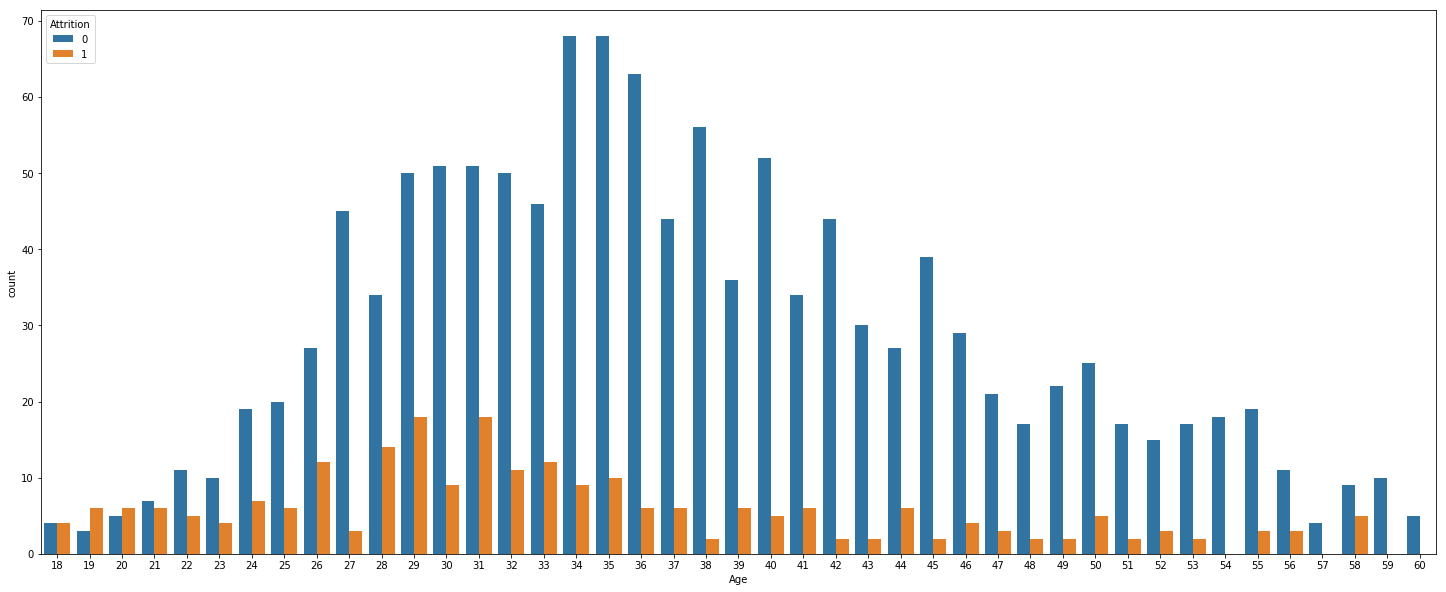

In [29]:
# Age & attrition Distribution
plt.figure(figsize=(25,10))
sns.countplot(x='Age', hue='Attrition', data=df)

- Up until age of 30 a large percentage of employees were leaving
- As you grow older that percentage drops and you're more inclined to stay
- So age is a factor

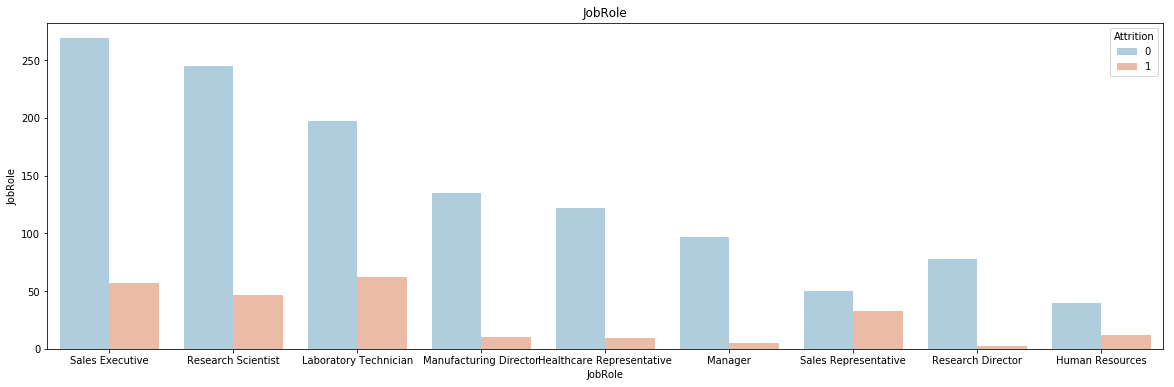

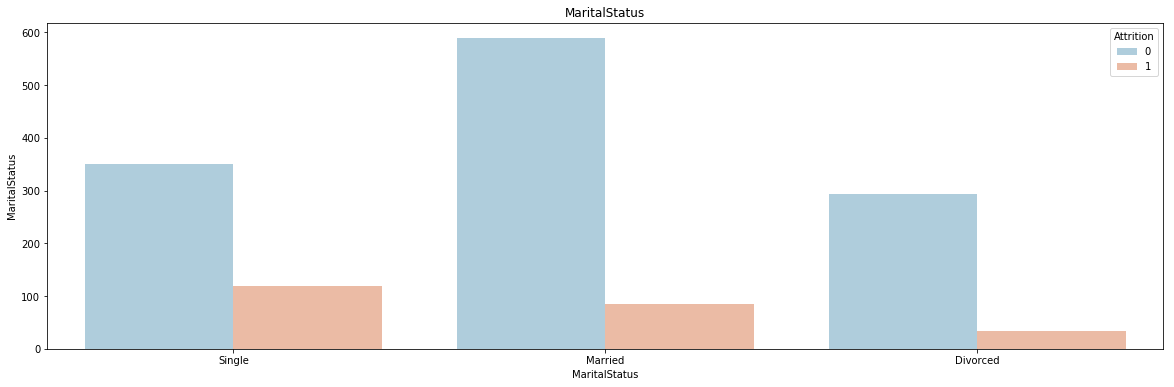

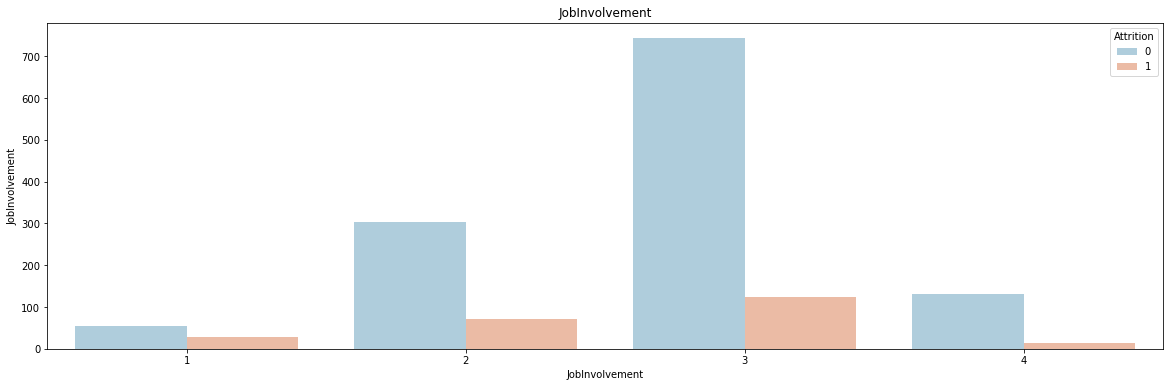

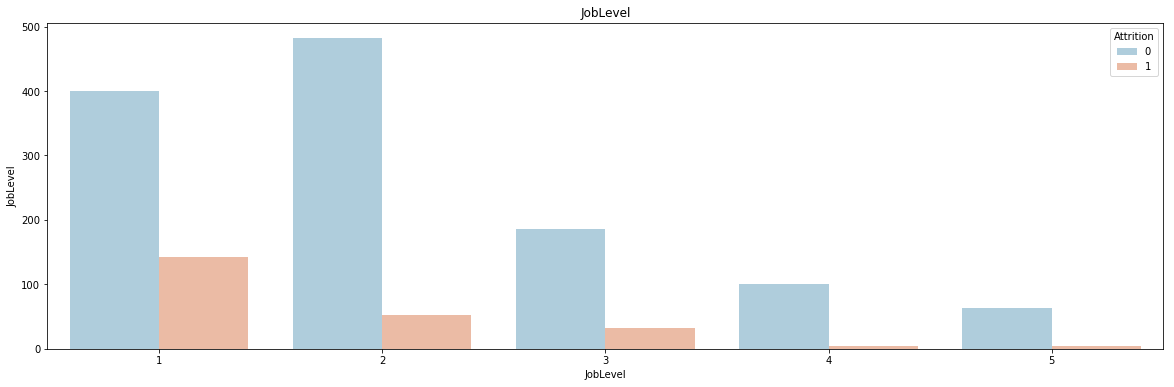

In [31]:
# 'JobRole', 'MaritalStatus','JobInvolvement', 'JobLevel' & Attrition Distribution
def analyse(df, var):
      df = df.copy()
      plt.figure(figsize=(20,6))
      sns.countplot(x=var,hue='Attrition',data=df,palette='RdBu_r')
      plt.title(var)
      plt.ylabel(var)
      plt.show()
    
for var in ['JobRole', 'MaritalStatus','JobInvolvement', 'JobLevel']:
    analyse(df, var)
    


- Single employees tend to leave compared to married and divorced
- Sales Representitives tend to leave compared to any other job - has a high turnover
- Less involved employees tend to leave the company 
- Less experienced (low job level) tend to leave the company whilst higher job level (more experienced) tend to stay

In [ ]:
# Note:
# KDE - kernal Density Estimate - visualises theproperty density of a continuous variable.
# It describes the probability density at different values in a continuous variable


In [33]:
df_left = df[df['Attrition'] == 1]
df_stayed = df[df['Attrition'] == 0]

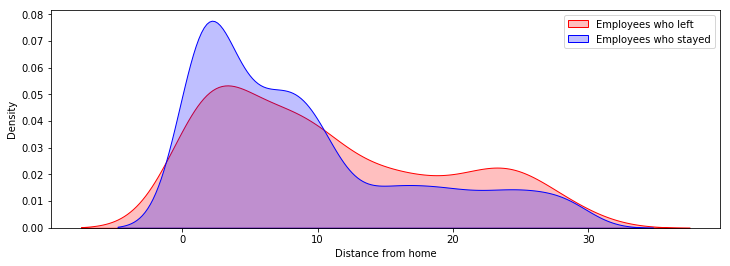

In [37]:
# Distance from Home
plt.figure(figsize=(12,4))
sns.kdeplot(df_left['DistanceFromHome'], label='Employees who left', color='r', shade=True)
sns.kdeplot(df_stayed['DistanceFromHome'], label='Employees who stayed', color='b', shade=True)
plt.xlabel('Distance from home')
plt.legend()

- As the distance increases (10-30) the number of employees who left is higher than those that stayed


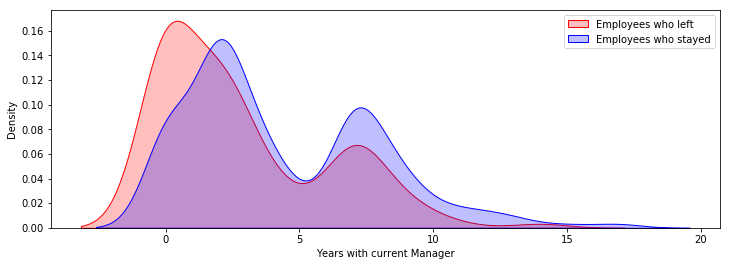

In [38]:
# YearsWithCurrManager
plt.figure(figsize=(12,4))
sns.kdeplot(df_left['YearsWithCurrManager'], label='Employees who left', color='r', shade=True)
sns.kdeplot(df_stayed['YearsWithCurrManager'], label='Employees who stayed', color='b', shade=True)
plt.xlabel('Years with current Manager')
plt.legend()

- Employees with relatively less than 1 year with current Manager tended to leave but higher numbers of employess who had 1 year+ with current manager tended to stay. 

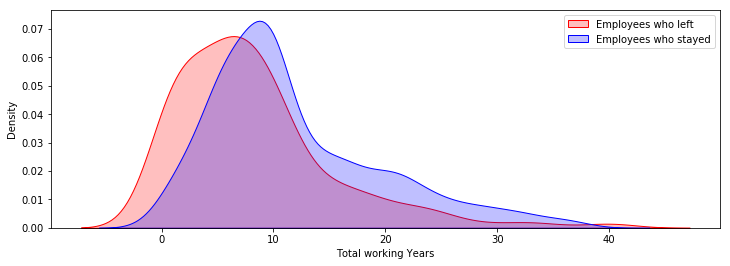

In [39]:
# TotalWorkingYears
plt.figure(figsize=(12,4))
sns.kdeplot(df_left['TotalWorkingYears'], label='Employees who left', color='r', shade=True)
sns.kdeplot(df_stayed['TotalWorkingYears'], label='Employees who stayed', color='b', shade=True)
plt.xlabel('Total working Years')
plt.legend()

- Higher number of Employees left working up to appoximately 5/6 years. After which higher numbers stayed with the more total working years

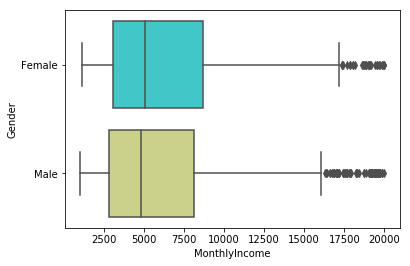

In [40]:
# Let's see the Gender vs. Monthly Income
sns.boxplot(x="MonthlyIncome", y='Gender', data=df, palette='rainbow') 


- Average is pretty comparable for both Male & Female

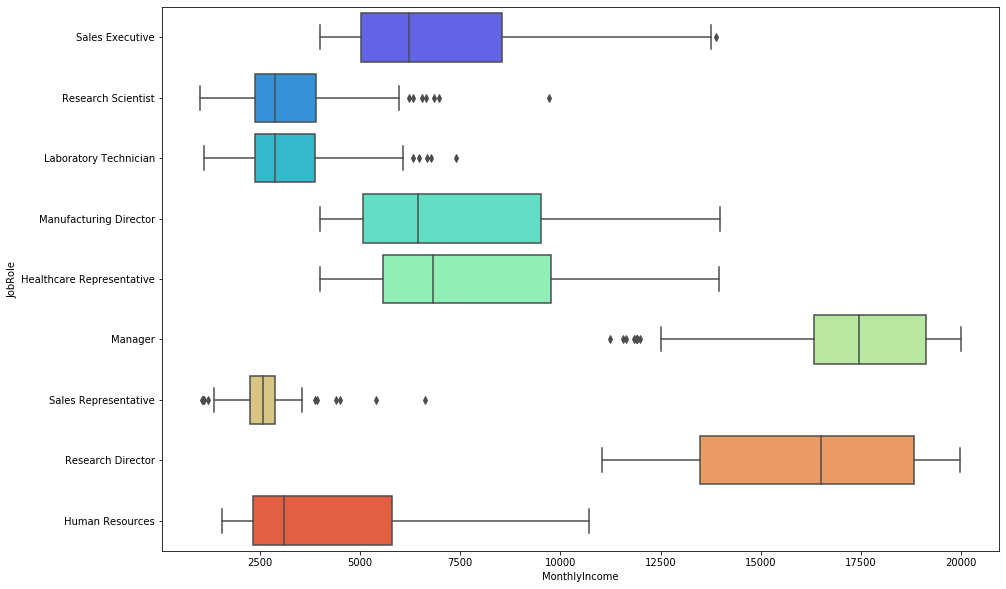

In [148]:
# Let's see the Job Role vs. Monthly Income
plt.figure(figsize=(15,10))
sns.boxplot(x="MonthlyIncome", y='JobRole', data=df, palette='rainbow') 

- Research Scientist, Lab Tech and Sales Rep are in the lower scale of pay.

- We have an unbalanced dataset so we can increase the number of samples for empolyees who left the Co.